In [ ]:
from copulae1 import *

Empirical Illustration

We consider the daily returns of Bitcoin, the Bitcoin CME future, and CRIX over the period of . An attractive feature of the copula is that the marginal distributions and the dependence structure can be modelled and estimated spearately. There are vast literatures about modelling an univariate financial asset returns for different purposes, To name a few,  parametric ones including AR models, GARCH, Generalised hyperbolic, Levy processes. Since this study is about hedging dependence, we impose minimal structure to the marginal distribution by using empirical CDF and kernel density estimation. 

The empirical CDF

kernel density estimation

We use Gaussian kernel $formula$ with bandwidth selected from LOO MLE (ref). 

Test of autocorrelation suggest no autocorrelation in the log return data. 

The rank correlation between Bitcoin and CME future is with a 90% bootstrap confidence interval of [a,b], tau between CRIX and CME future is X with CI of [a,b], indicating that the dependence between these series is positive and relatively strong. The upper panel of Fig.1 presents the estimated quantile dependence for $q\in [0.025, 0.975]$ together with 90% pointwise CI. Quantile denpednece is the probability of concordance conditioned on $q$. The quantile dependence $\lambda^L(q) = \frac{\mathbb{P}(U > q, V > q)}{1-q}$ for $q \in [0,0.5)$, $\lambda^L(q) = \frac{\mathbb{P}(U \leq q, V \leq q)}{q}$ for 
$q \in (0.5,1]$. $\lambda^U(q)$ and $\lambda^L(q)$ is also known as upper quantile dependence ad lower quantile dependence respectively. Observe the upper panel of figure 1, the quantile dependence is higher in the center but lower in the tails. Similar observation can be seen is the quantile dependence of SP100 and SP600, see Patton (2012). 

Futhermore, the CI is narrower in the center of distribution (around the median) but wider near the tails. The wide CIs in the two tails suggest a high uncertainty in the dependence of extreme events (extreme price movements). 

The quantile dependence is not skew, i.e. the upper and lower quantile dependence is in a similar level. 

A review of copula models for economic time series

Patton (2012) Journal of Multivariate Analysis


In [3]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')

In [6]:
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [251]:
q_arr = np.linspace(0.01,.99,50)
L_arr = []

for _ in range(2000):
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    L = np.array([empirical_lambda(_u,_v,q) for q in q_arr])
    L_arr.append(L)
    
L_arr = np.array(L_arr)

Text(0.5, 0, '$q$')

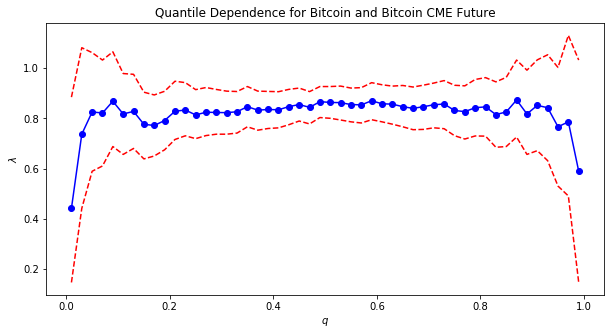

In [282]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'r--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.5, axis=0), 'b-o')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'r--')
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$q$')



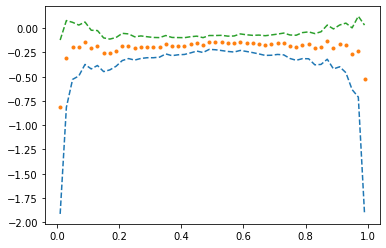

In [254]:
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.05, axis=0)), '--')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.5, axis=0)), '.')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.95, axis=0)), '--')

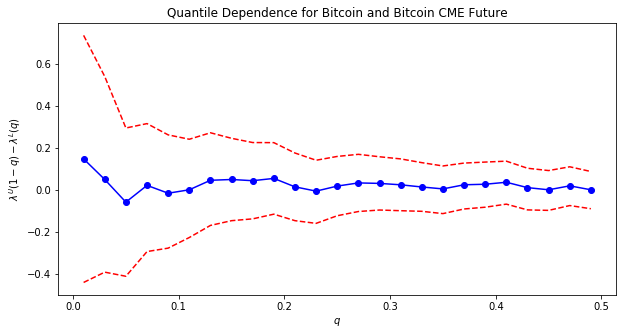

In [286]:
plt.figure(figsize=(10,5))
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda^U(1-q) - \lambda^L(q)$')
plt.xlabel(r'$q$')

D = np.flip(L_arr[:,25:]) - (L_arr[:,:25]) 
plt.plot(q_arr[:25], np.quantile(D, 0.05, axis=0), 'r--')
plt.plot(q_arr[:25], np.quantile(D, 0.5, axis=0), 'b-o')
plt.plot(q_arr[:25], np.quantile(D, 0.95, axis=0), 'r--')

In [165]:
para_arr = []
C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    C.canonical_calibrate(_u,_v)
    para_arr.append(C.rho)


0
Optimization terminated successfully.
         Current function value: -0.978728
         Iterations: 32
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -0.962636
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.984706
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.938853
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1.199715
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -1.029001
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.873008
         Iterations: 30
         Function evaluations: 64
Optimization terminated s

Optimization terminated successfully.
         Current function value: -0.975657
         Iterations: 30
         Function evaluations: 63
60
Optimization terminated successfully.
         Current function value: -1.016564
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.900022
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.901623
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.914847
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.962086
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.975844
         Iterations: 31
         Function evaluations: 65
Optimization terminated 

Optimization terminated successfully.
         Current function value: -1.008317
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.961857
         Iterations: 30
         Function evaluations: 64
120
Optimization terminated successfully.
         Current function value: -0.989927
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1.004687
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.952390
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.958558
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.985085
         Iterations: 30
         Function evaluations: 64
Optimization terminated

Optimization terminated successfully.
         Current function value: -1.036894
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.876693
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.921139
         Iterations: 30
         Function evaluations: 64
180
Optimization terminated successfully.
         Current function value: -0.971407
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.950256
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -1.029333
         Iterations: 31
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -0.887528
         Iterations: 31
         Function evaluations: 64
Optimization terminated

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1302fe3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd12fcbe690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1302fe210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd130319290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd130321650>],
 'means': []}

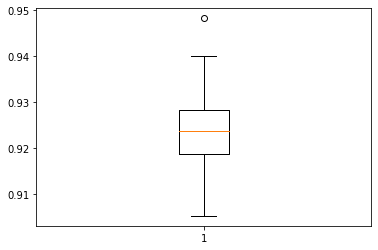

In [167]:
plt.boxplot(para_arr)

In [220]:
para_arr_MM = []
para_arr_MLE = []
para_0 = {'theta':10}
C = Clayton(para_0, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = ECDF(brr[_id])(brr[_id])
    _v = ECDF(btc[_id])(btc[_id])
    C.__init__(para_0, C.Law_RS, C.Law_RF)
    C.canonical_calibrate(_u,_v)
    para_arr_MLE.append(C.theta)
    C.mm_calibrate(_u,_v, [0.05,0.1,0.9,0.95])
    para_arr_MM.append(C.theta)
    
para_arr_MM = np.array(para_arr_MM)
para_arr_MLE = np.array(para_arr_MLE)

0
Optimization terminated successfully.
         Current function value: -0.810971
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.158717
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -0.775486
         Iterations: 40
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.097174
         Iterations: 44
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: -0.827181
         Iterations: 39
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.089048
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.731386
         Iterations: 40
         Function evaluations: 87
Optimization terminated su

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:393: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(part1 * part2))


Optimization terminated successfully.
         Current function value: 0.075525
         Iterations: 47
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.869670
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.125108
         Iterations: 46
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.798847
         Iterations: 39
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.073534
         Iterations: 46
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.804195
         Iterations: 41
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.126882
         Iterations: 46
         Function evaluations: 102
Optimization terminated succ

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:392: RuntimeWarning: divide by zero encountered in power
  part2 = (-1 + u ** (-theta) + v ** (-theta)) ** (-2 - (1 / theta))
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:393: RuntimeWarning: invalid value encountered in multiply
  return np.mean(np.log(part1 * part2))


Optimization terminated successfully.
         Current function value: 0.119881
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.865937
         Iterations: 39
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.074595
         Iterations: 46
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.765017
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.131422
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.827267
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.075614
         Iterations: 48
         Function evaluations: 108
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.115215
         Iterations: 45
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -0.771880
         Iterations: 40
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.153524
         Iterations: 45
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -0.807301
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.130324
         Iterations: 45
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.753281
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.130088
         Iterations: 46
         Function evaluations: 101
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.148806
         Iterations: 47
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: -0.920917
         Iterations: 41
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.083743
         Iterations: 45
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -0.798628
         Iterations: 41
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.178607
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -0.838035
         Iterations: 40
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.143951
         Iterations: 48
         Function evaluations: 104
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.139193
         Iterations: 47
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.777673
         Iterations: 39
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.115872
         Iterations: 47
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.807816
         Iterations: 39
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.096888
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.779923
         Iterations: 39
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.150537
         Iterations: 46
         Function evaluations: 102
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.094599
         Iterations: 48
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.853997
         Iterations: 39
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.090430
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.804326
         Iterations: 41
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.108553
         Iterations: 45
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.753095
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.146599
         Iterations: 46
         Function evaluations: 102
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.086472
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.799859
         Iterations: 41
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.105249
         Iterations: 48
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -0.806358
         Iterations: 39
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.126355
         Iterations: 46
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -0.807259
         Iterations: 41
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.087687
         Iterations: 44
         Function evaluations: 96
Optimization terminated succ

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd11cbf4710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd11bcbbfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd11bcbbcd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd11cbeabd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd11cbf4cd0>,
 'means': []}

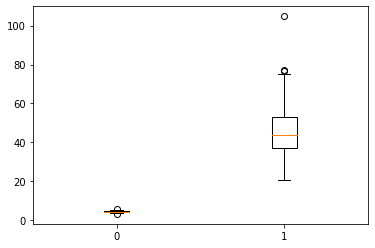

In [226]:
# plt.boxplot(para_arr_MM)

tau_MLE = para_arr_MLE/(para_arr_MLE+2)
tau_MM = para_arr_MM/(para_arr_MM+2)

# tau_MLE = (para_arr_MLE-1)/para_arr_MLE
# tau_MM = (para_arr_MM-1)/para_arr_MM
# plt.boxplot([tau_MLE,tau_MM], positions=[0,1])

plt.boxplot([para_arr_MLE,para_arr_MM], positions=[0,1])

In [229]:
np.mean(para_arr_MLE)/np.std(para_arr_MLE)

11.666873274736526

In [230]:
np.mean(para_arr_MM)/np.std(para_arr_MM)

3.7377081082648864

Optimization terminated successfully.
         Current function value: -0.952981
         Iterations: 32
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.008934
         Iterations: 33
         Function evaluations: 68


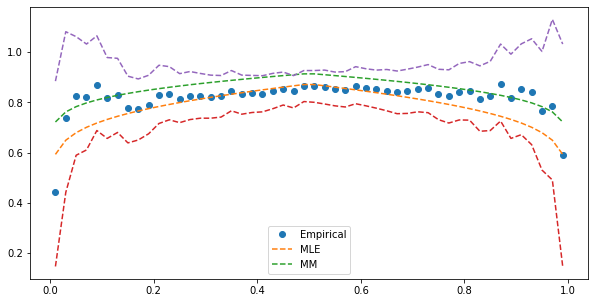

In [270]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")

plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')

plt.legend()

Optimization terminated successfully.
         Current function value: -1.084665
         Iterations: 138
         Function evaluations: 257
Optimization terminated successfully.
         Current function value: 0.002347
         Iterations: 109
         Function evaluations: 201


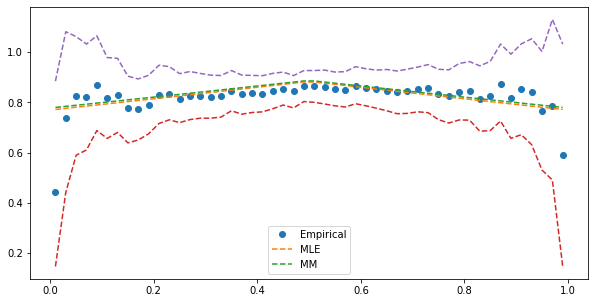

In [271]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C.mm_calibrate(u,v,[0.05,0.3,0.7,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')
plt.legend()

In [235]:
L_C

array([0.78142593, 0.78549935, 0.78958464, 0.79368151, 0.79778963,
       0.80190869, 0.80603835, 0.8101783 , 0.81432819, 0.81848769,
       0.82265645, 0.82683412, 0.83102036, 0.83521481, 0.8394171 ,
       0.84362688, 0.84784378, 0.85206743, 0.85629746, 0.86053349,
       0.86477515, 0.86902206, 0.87327384, 0.8775301 , 0.88179046,
       0.88179046, 0.8775301 , 0.87327384, 0.86902206, 0.86477515,
       0.86053349, 0.85629746, 0.85206743, 0.84784378, 0.84362688,
       0.8394171 , 0.83521481, 0.83102036, 0.82683412, 0.82265645,
       0.81848769, 0.81432819, 0.8101783 , 0.80603835, 0.80190869,
       0.79778963, 0.79368151, 0.78958464, 0.78549935, 0.78142593])

Optimization terminated successfully.
         Current function value: -0.999565
         Iterations: 39
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.038363
         Iterations: 39
         Function evaluations: 85


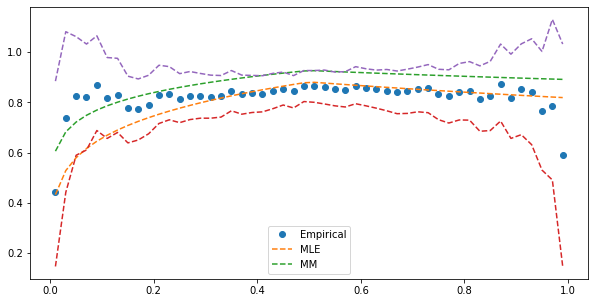

In [272]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')
plt.legend()

Optimization terminated successfully.
         Current function value: -0.827703
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.095431
         Iterations: 47
         Function evaluations: 105


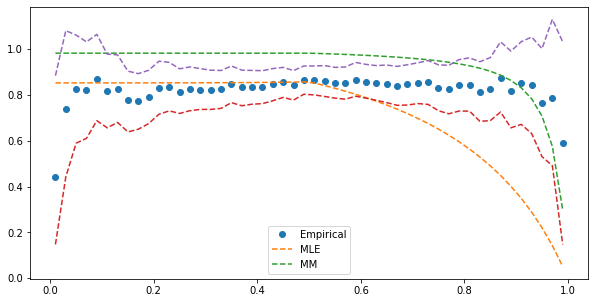

In [273]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Clayton({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Clayton({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')
plt.legend()

Optimization terminated successfully.
         Current function value: -0.885051
         Iterations: 39
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.053230
         Iterations: 57
         Function evaluations: 118


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:478: RuntimeWarning: divide by zero encountered in log
  return A * np.log(B)


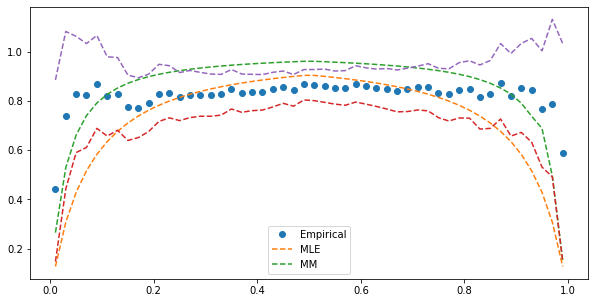

In [274]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Frank({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Frank({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')
plt.legend()

Optimization terminated successfully.
         Current function value: -1.043719
         Iterations: 79
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 0.002953
         Iterations: 81
         Function evaluations: 168


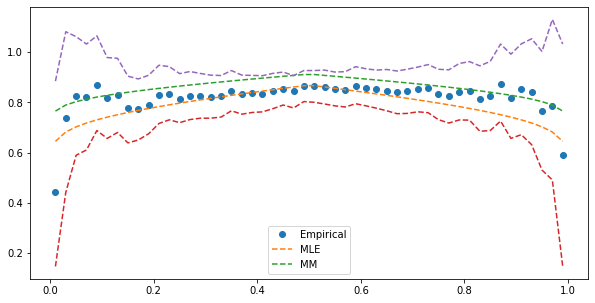

In [275]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), '--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), '--')
plt.legend()

Optimization terminated successfully.
         Current function value: -1.043719
         Iterations: 71
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 0.002953
         Iterations: 75
         Function evaluations: 159


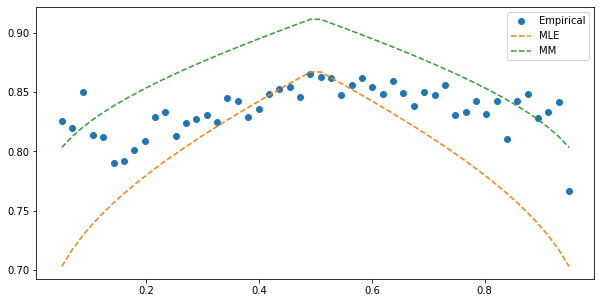

In [233]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'o', label='Empirical')

C = Gaussian_Mix_Independent({'rho':0.8, 'p':0.7}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian_Mix_Independent({'rho':0.8, 'p':0.7}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.legend()